In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data = pd.read_csv('insurance.csv')

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.shape

(1338, 7)

Text(0, 0.5, 'count')

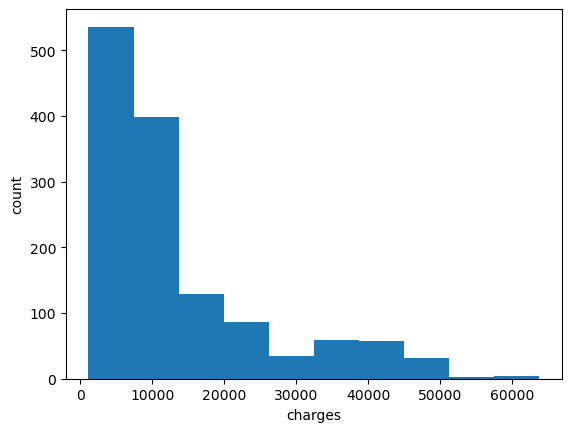

In [11]:
plt.hist(data['charges'])
plt.xlabel('charges')
plt.ylabel('count')

In [13]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
mean = np.mean(data['charges'])
mean

13270.422265141257

In [17]:
std = np.std(data['charges'])
std

12105.484975561605

In [19]:
# calculate Z-score
(data['charges'] - mean)/mean

0       0.272373
1      -0.869970
2      -0.664708
3       0.656652
4      -0.708611
          ...   
1333   -0.201190
1334   -0.833767
1335   -0.877183
1336   -0.848690
1337    1.195963
Name: charges, Length: 1338, dtype: float64

In [21]:
# show z score also above table
data['charges_z_Score'] = (data['charges'] - mean)/mean

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges,charges_z_Score
0,19,female,27.900,0,yes,southwest,16884.92400,0.272373
1,18,male,33.770,1,no,southeast,1725.55230,-0.869970
2,28,male,33.000,3,no,southeast,4449.46200,-0.664708
3,33,male,22.705,0,no,northwest,21984.47061,0.656652
4,32,male,28.880,0,no,northwest,3866.85520,-0.708611


In [29]:
data[data['charges_z_Score'] > 3]

,age,sex,bmi,children,smoker,region,charges,charges_z_Score
543,54,female,47.410,0,yes,southeast,63770.42801,3.805456
577,31,female,38.095,1,yes,northeast,58571.07448,3.413656
819,33,female,35.530,0,yes,northwest,55135.40209,3.154759
1230,52,male,34.485,3,yes,northwest,60021.39897,3.522946
1300,45,male,30.360,0,yes,southeast,62592.87309,3.716721


In [31]:
data[data['charges_z_Score'] < -3]

,age,sex,bmi,children,smoker,region,charges,charges_z_Score


In [33]:
data['charges_z_Score'].min()

-0.9154605725737199

In [35]:
data['charges_z_Score'].max()

3.8054558276952615

In [45]:
# To remove data
outlier_indexes = []

In [49]:
outlier_indexes.extend(data.index[data['charges_z_Score']>3].tolist())

In [51]:
outlier_indexes

[543, 577, 819, 1230, 1300]

In [53]:
outlier_indexes.extend(data.index[data['charges_z_Score']<-3].tolist())

In [55]:
new_data = data.drop(data.index[outlier_indexes])

In [57]:
new_data.head()

,age,sex,bmi,children,smoker,region,charges,charges_z_Score
0,19,female,27.900,0,yes,southwest,16884.92400,0.272373
1,18,male,33.770,1,no,southeast,1725.55230,-0.869970
2,28,male,33.000,3,no,southeast,4449.46200,-0.664708
3,33,male,22.705,0,no,northwest,21984.47061,0.656652
4,32,male,28.880,0,no,northwest,3866.85520,-0.708611


In [63]:
data.shape[0],new_data.shape[0]

(1338, 1333)

In [67]:
new_data = new_data.drop('charges_z_Score',axis = 1)
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0, 0.5, 'count')

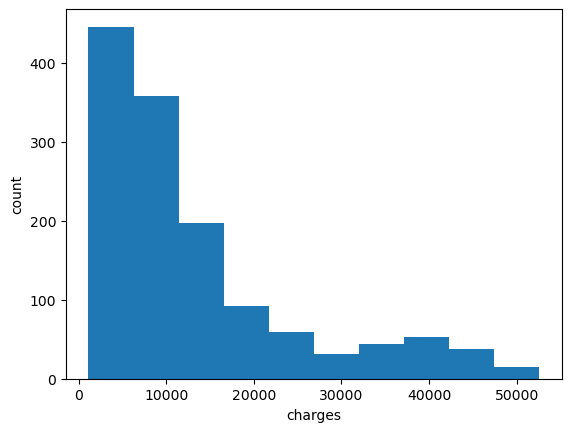

In [69]:
# plot the new data set
plt.hist(new_data['charges'])
plt.xlabel('charges')
plt.ylabel('count')